# Creating and Manipulating Graphs
Hello, I hope by doing this PS you start diving into the world of **Network science**.

Feel free to ask about any ambiguities 

Enjoy it.
***********
### Mohammad Mahyar Esfahani
******
Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `files/Employee_Movie_Choices.txt`.

A second file, `files/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Question 1

Using NetworkX, load in the bipartite graph from `files/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    '''this function opens the data file, then reads each line and saves its values then splits each line
    and stores the first column in the list named: employees and stores the second column in the list named:
    movies. then deletes duplicate values. Then creates a list with each entry as a tuple that it is the values
    of the edges of the graph. Moreover, draws the bipartite graph of the data.
    '''
    # opening the data file and reading each line
    data_tuples = []
    with open("files/Employee_Movie_Choices.txt", "r") as file:
        next(file)
        for line in file:
            parts = line.strip().split("\t")
            if len(parts) >= 2:
                employee, movie = parts[0], parts[1]
                data_tuples.append((employee, movie))
    
    # stroing employees and movies in separate np arrays
    employees = np.array([t[0] for t in data_tuples])
    movies = np.array([t[1] for t in data_tuples])
    
    # deleting duplicate elements
    employees = np.unique(employees)
    movies = np.unique(movies)
    
    # introducing edges
    edges = []
    for i in range(len(data_tuples)):
        temp = tuple((data_tuples[i][0], data_tuples[i][1]))
        edges.append(temp)
        
    # baking the graph with secret ingredients
    B = nx.Graph()
    B.add_nodes_from(employees, bipartite=0)
    B.add_nodes_from(movies, bipartite=1)
    B.add_edges_from(edges)
    
    return B, employees, movies

In [3]:
def plot_bipartite_graph(G, lst1):
    '''plot the bipartite graph'''
    pos = nx.bipartite_layout(G, lst1)
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=12)
    print(f'nodes: {len(G.nodes())}, edges: {len(G.edges())}')

nodes: 19, edges: 24


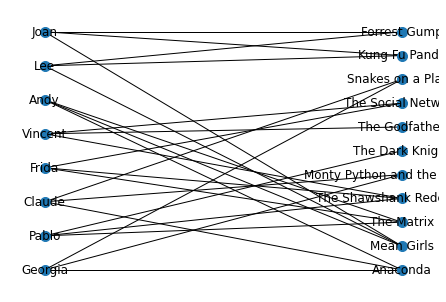

In [4]:
G = answer_one()
plot_bipartite_graph(G[0], G[1])

In [5]:
assert type(answer_one()[0]) == nx.Graph , "Your return type should be a Graph object"
# Please note that the assert statement is used for debugging and testing purposes. It's typically disabled in production code.

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [6]:
def answer_two():
    '''this function assigns the type of the data and returns the graph '''
    # loading the data from the fucntion answer_one()
    G = answer_one()[0]
    employees = answer_one()[1]
    movies = answer_one()[2]
    
    # assigning the attributes to each data
    node_attributes = {}
    for i in range(len(employees)):
        node_attributes[f"{employees[i]}"] =  dict(type='employee')
    for i in range(len(movies)):
        node_attributes[f"{movies[i]}"] = dict(type="movie")
    nx.set_node_attributes(G, node_attributes)
    return G

In [7]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [8]:
def answer_three():
    G = answer_two()
    weighted_projected_graph = nx.bipartite.weighted_projected_graph(G, answer_one()[1], ratio=False)
    return weighted_projected_graph

In [9]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"

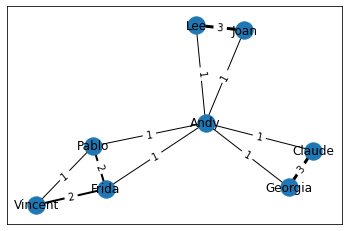

In [77]:
# just Run it to see what you have done
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True);

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

*****************************************************

## Pearson Correlation (for further study)

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. It is calculated using the following formula:

![Pearson correlation formula](https://latex.codecogs.com/svg.latex?r%20%3D%20%5Cfrac%7B%5Csum%20%28%28x%20-%20%5Cmu_x%29%28y%20-%20%5Cmu_y%29%29%7D%7B%5Csqrt%7B%5Csum%20%28x%20-%20%5Cmu_x%29%5E2%7D%20%5Ccdot%20%5Csqrt%7B%5Csum%20%28y%20-%20%5Cmu_y%29%5E2%7D%7D)

where:
- ![r](https://latex.codecogs.com/svg.latex?r) is the Pearson correlation coefficient,
- ![x](https://latex.codecogs.com/svg.latex?x) and ![y](https://latex.codecogs.com/svg.latex?y) are the variables being correlated,
- ![mu_x](https://latex.codecogs.com/svg.latex?%5Cmu_x) and ![mu_y](https://latex.codecogs.com/svg.latex?%5Cmu_y) are the means of ![x](https://latex.codecogs.com/svg.latex?x) and ![y](https://latex.codecogs.com/svg.latex?y), respectively,
- ![Σ](https://latex.codecogs.com/svg.latex?%5Csum) denotes the summation symbol.

The Pearson correlation coefficient ranges from -1 to 1, where:
- 1 indicates a perfect positive linear relationship,
- -1 indicates a perfect negative linear relationship, and
- 0 indicates no linear relationship.

The Pearson correlation is commonly used in statistics and data analysis to assess linear associations between variables. However, it assumes that the variables are normally distributed and only captures linear relationships.

Please note that the formula above might not render correctly in the plain text representation. It is recommended to view it in the rendered Markdown or in a browser that supports LaTeX.

If you have any further questions or need additional assistance, please let me know!

In [185]:
def answer_four():
    '''this fucntion calculates the pearson correlation between two graphs G1 and G2 and returns the
    value of correlation coefficient.
    '''
    # making a weighted projected graph of movies in common by reading the data from the .txt file
    Movies_in_common_without_zero = answer_three()

    #making the graph of relationship of the employees by reading the .txt file
    Relations = nx.read_edgelist('files/Employee_Relationships.txt', data=[('weight', int)])

    # adding zero weight for people who have zero common interests in movies in the movie graph
    employees = answer_one()[1]
    projected_graph = answer_three()
    for employee1 in employees:
        for employee2 in employees:
            if employee1 != employee2 and not Movies_in_common_without_zero.has_edge(employee1, employee2):
                Movies_in_common_without_zero.add_edge(employee1, employee2, weight=0)

    Movies_in_common = Movies_in_common_without_zero
    
    # Now the graphs are ready to go but their edge sequence is not similar. We have to tackle this issue!
    data_of_graph_relation = list(Relations.edges(data=True))
    data_of_graph_movies_in_common = list(Movies_in_common.edges(data=True))

    Relations_new = nx.Graph()
    Relations_new.add_edges_from(data_of_graph_relation)

    Movies_in_common_new = nx.Graph()
    Movies_in_common_new.add_edges_from(data_of_graph_movies_in_common)

    # Create a mapping from nodes in the first graph to nodes in the second graph
    node_mapping = dict()
    for node1 in Relations_new.nodes():
        for node2 in Movies_in_common_new.nodes():
            if node1 == node2:
                node_mapping[node1] = node2
                break

    aligned_edges_second_graph = [(node_mapping[u], node_mapping[v], Relations_new[u][v]) for u, v in Relations_new.edges()]
    
    # define the data for the first and second graphs (you can simply get this data by a for loop)
    data_first_graph = [('Andy', 'Georgia', {'weight': -10}),
     ('Andy', 'Pablo', {'weight': -10}),
     ('Andy', 'Claude', {'weight': 0}),
     ('Andy', 'Frida', {'weight': 20}),
     ('Andy', 'Lee', {'weight': -10}),
     ('Andy', 'Joan', {'weight': 30}),
     ('Andy', 'Vincent', {'weight': 20}),
     ('Georgia', 'Claude', {'weight': 90}),
     ('Georgia', 'Frida', {'weight': 0}),
     ('Georgia', 'Joan', {'weight': 0}),
     ('Georgia', 'Lee', {'weight': 10}),
     ('Georgia', 'Pablo', {'weight': 0}),
     ('Georgia', 'Vincent', {'weight': 0}),
     ('Pablo', 'Claude', {'weight': 10}),
     ('Pablo', 'Frida', {'weight': 50}),
     ('Pablo', 'Joan', {'weight': 0}),
     ('Pablo', 'Lee', {'weight': 0}),
     ('Pablo', 'Vincent', {'weight': -20}),
     ('Claude', 'Frida', {'weight': 0}),
     ('Claude', 'Joan', {'weight': 0}),
     ('Claude', 'Lee', {'weight': 0}),
     ('Claude', 'Vincent', {'weight': 0}),
     ('Frida', 'Vincent', {'weight': 60}),
     ('Frida', 'Joan', {'weight': 0}),
     ('Frida', 'Lee', {'weight': 0}),
     ('Lee', 'Joan', {'weight': 70}),
     ('Lee', 'Vincent', {'weight': 0}),
     ('Joan', 'Vincent', {'weight': 10})]

    data_second_graph = [('Andy', 'Georgia', {'weight': 1}),
     ('Andy', 'Pablo', {'weight': 1}),
     ('Andy', 'Claude', {'weight': 1}),
     ('Andy', 'Frida', {'weight': 1}),
     ('Andy', 'Lee', {'weight': 1}),
     ('Andy', 'Joan', {'weight': 1}),
     ('Andy', 'Vincent', {'weight': 0}),
     ('Claude', 'Georgia', {'weight': 3}),
     ('Claude', 'Frida', {'weight': 0}),
     ('Claude', 'Joan', {'weight': 0}),
     ('Claude', 'Lee', {'weight': 0}),
     ('Claude', 'Pablo', {'weight': 0}),
     ('Claude', 'Vincent', {'weight': 0}),
     ('Frida', 'Pablo', {'weight': 2}),
     ('Frida', 'Vincent', {'weight': 2}),
     ('Frida', 'Georgia', {'weight': 0}),
     ('Frida', 'Joan', {'weight': 0}),
     ('Frida', 'Lee', {'weight': 0}),
     ('Georgia', 'Joan', {'weight': 0}),
     ('Georgia', 'Lee', {'weight': 0}),
     ('Georgia', 'Pablo', {'weight': 0}),
     ('Georgia', 'Vincent', {'weight': 0}),
     ('Joan', 'Lee', {'weight': 3}),
     ('Joan', 'Pablo', {'weight': 0}),
     ('Joan', 'Vincent', {'weight': 0}),
     ('Lee', 'Pablo', {'weight': 0}),
     ('Lee', 'Vincent', {'weight': 0}),
     ('Pablo', 'Vincent', {'weight': 1})]

    # Create two graphs using NetworkX
    G1 = nx.Graph()
    G1.add_edges_from(data_first_graph)

    G2 = nx.Graph()
    G2.add_edges_from(data_second_graph)

    # Create a mapping from nodes in the first graph to nodes in the second graph
    node_mapping = dict()
    for node1 in G1.nodes():
        for node2 in G2.nodes():
            if node1 == node2:
                node_mapping[node1] = node2
                break

    # Create the edge sequence for the second graph to match the first graph's edge sequence
    aligned_edges_second_graph = [(node_mapping[u], node_mapping[v], G1[u][v]) for u, v in G1.edges()]

    x = [d['weight'] for u, v, d in G1.edges(data=True)]
    y = [d['weight'] for u, v, d in G2.edges(data=True)]

    correlation, _ = pearsonr(x, y)
    return correlation

In [186]:
print(f'Pearson correlation between the two graphs is: {answer_four()}')

Pearson correlation between the two graphs is: 0.7883962221733473


### Question 5
Consider a bipartite graph representing a movie recommendation system stored in a variable B of type networkx.Graph(). The graph consists of two sets of nodes: users and movies. Each user node is connected to movie nodes with corresponding ratings.

Write a Python function named recommend_movies(B, user) that takes the bipartite graph B and a specific user as input. The function should return a list of recommended movies for the given user based on the following criteria:

- Only recommend movies that have not been rated by the user.
- The recommendation score for each movie should be calculated as the sum of the ratings from other users who have rated the movie. Higher recommendation scores indicate more popular movies.
- Sort the recommended movies in descending order based on their recommendation scores.

In [372]:
def make_rating_graph():
    '''this function makes a weighted bipartite graph that the weights are random number between
    1 and 5. This function makes random edges between employees and movies with probability 1/2.
    This function returns the graph itself and the list of employees.
    '''
    # getting some ingredients from previous functions
    B = answer_two()
    employees = list(nx.bipartite.sets(B)[0])
    movies = list(nx.bipartite.sets(B)[1])

    # initializing the rating graph
    Rating_graph = nx.Graph()
    Rating_graph.add_nodes_from(employees, bipartite=0)
    Rating_graph.add_nodes_from(movies, bipartite=1)

    # making random edges between nodes with random weigths 1 to 5
    for j in range(len(employees)):
        for k in range(len(movies)):
            r = np.random.randint(2)
            if r == 1:
                weight = np.random.randint(1, 6)
                Rating_graph.add_edge(employees[j], movies[k], weight=weight)

    return Rating_graph, employees

In [403]:
def recommend_movies(Rating_graph, user):
    '''This function creates a recomending list for the user. Recommendation is based on the 
    given criteria.
    '''
    # get the set of movies that the user has already rated
    user_rated_movies = set(Rating_graph.neighbors(user))

    # make a dictionary to store recommendation scores for each movie
    recommendation_scores = {}

    # iterate over movies in the graph
    for movie in movies:
        # skip movies that the user has already rated
        if movie in user_rated_movies:
            continue
        # calculate recommendation score as the sum of ratings from other users
        score = sum(Rating_graph[other_user][movie]['weight'] for other_user in Rating_graph.neighbors(movie) if other_user != user)

        # store the recommendation score for the movie in the dictionary
        recommendation_scores[movie] = score

    # Ssrt the movies based on recommendation scores in a descending order
    recommended_movies = sorted(recommendation_scores.keys(), key=lambda x: recommendation_scores[x], reverse=True)

    return recommended_movies

nodes: 19, edges: 34


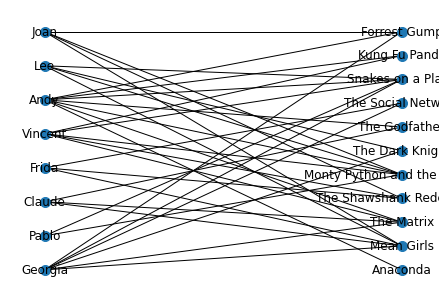

In [466]:
plot_bipartite_graph(Rating_graph, employees)
Rating_graph = make_rating_graph()[0]
employees = make_rating_graph()[1]

In [467]:
user = 'Joan'
print(f'recommended movies for {user} is: {recommend_movies(Rating_graph, user)}')

recommended movies for Joan is: ['Anaconda', 'Kung Fu Panda', 'The Matrix', 'The Dark Knight']


### Bonus problem
Make a directed graph according to random walk, with steps of random walk = $(10^2, 10^3, 10^4)$.

In [458]:
def random_walk_graph(random_walk, numbers=100):
    R = nx.DiGraph()
    
    numbers = 10**2
    nodes = [i for i in range(numbers)]
    R.add_nodes_from(nodes)
    
    r1 = 0
    for i in range(random_walk):
        r2 = np.random.randint(0, numbers)
        if r1 != r2:
            R.add_edge(r1, r2)
        r1 = np.random.randint(0, numbers)
    
    node_max_in_degree = max(R.in_degree(), key=lambda x: x[1])
    node_max_out_degree = max(R.out_degree(), key=lambda x: x[1])
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(R)
    nx.draw(R, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='red', arrowsize=10, node_size=10)
    plt.title(f'plot of the random walk graph with the steps: {random_walk}')
    plt.show()
    
    print(f'node with max in-degree: {node_max_in_degree}\nnode with max out-degree: {node_max_out_degree}')

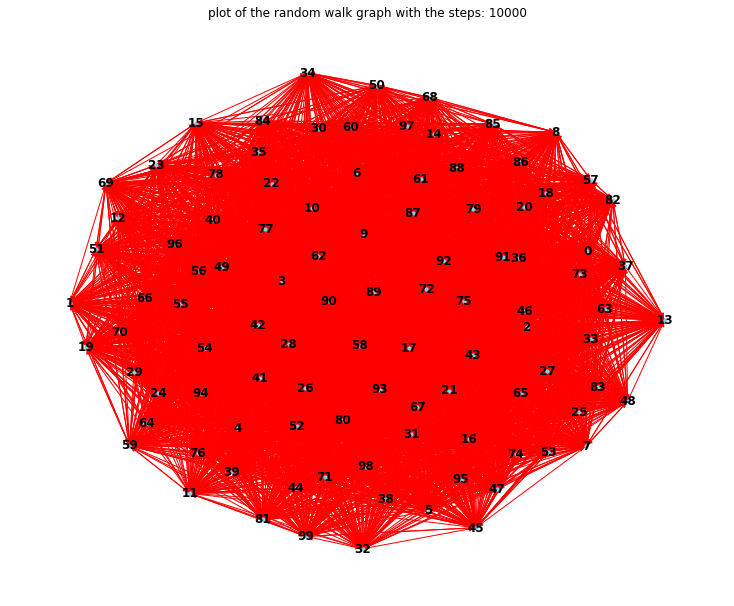

node with max in-degree: (25, 75)
node with max out-degree: (47, 72)


In [459]:
random_walk_graph(10**4)

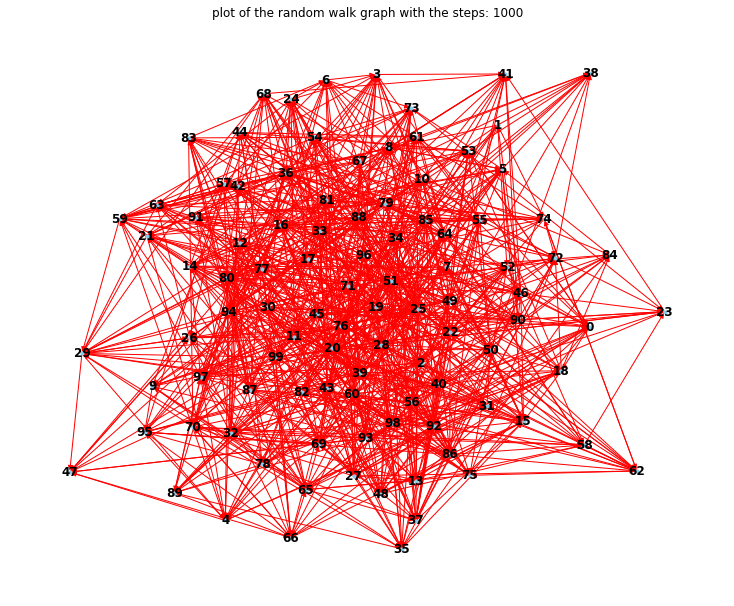

node with max in-degree: (15, 17)
node with max out-degree: (81, 17)


In [460]:
random_walk_graph(10**3)

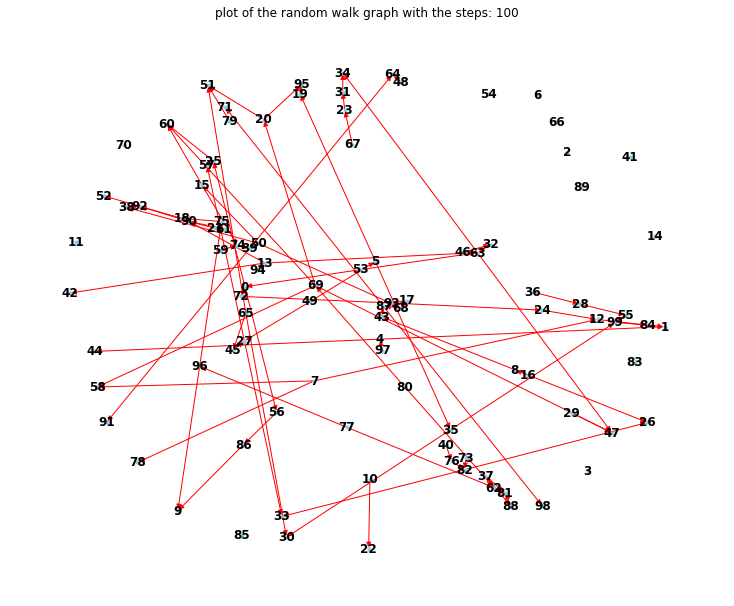

node with max in-degree: (47, 3)
node with max out-degree: (69, 4)


In [461]:
random_walk_graph(10**2)

In [462]:
def random_walk_graph2(random_walk, numbers=100):
    R = nx.DiGraph()
    
    numbers = 10**2
    nodes = [i for i in range(numbers)]
    R.add_nodes_from(nodes)
    
    r1 = 0
    for i in range(random_walk):
        r2 = np.random.randint(0, numbers)
        R.add_edge(r1, r2)
        r1 = np.random.randint(0, numbers)
    
    node_max_in_degree = max(R.in_degree(), key=lambda x: x[1])
    node_max_out_degree = max(R.out_degree(), key=lambda x: x[1])
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(R)
    nx.draw(R, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='red', arrowsize=10, node_size=10)
    plt.title(f'plot of the random walk graph with the steps: {random_walk}')
    plt.show()
    
    print(f'node with max in-degree: {node_max_in_degree}\nnode with max out-degree: {node_max_out_degree}')

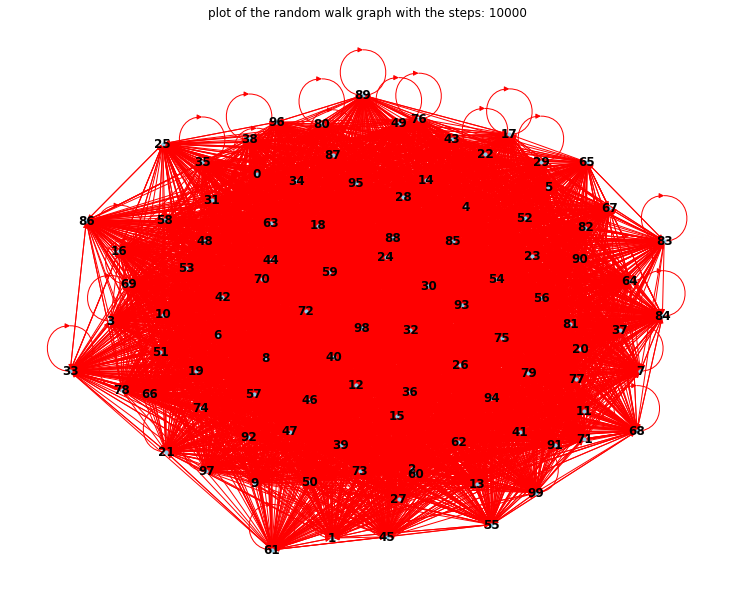

node with max in-degree: (84, 79)
node with max out-degree: (98, 73)


In [463]:
random_walk_graph2(10**4)

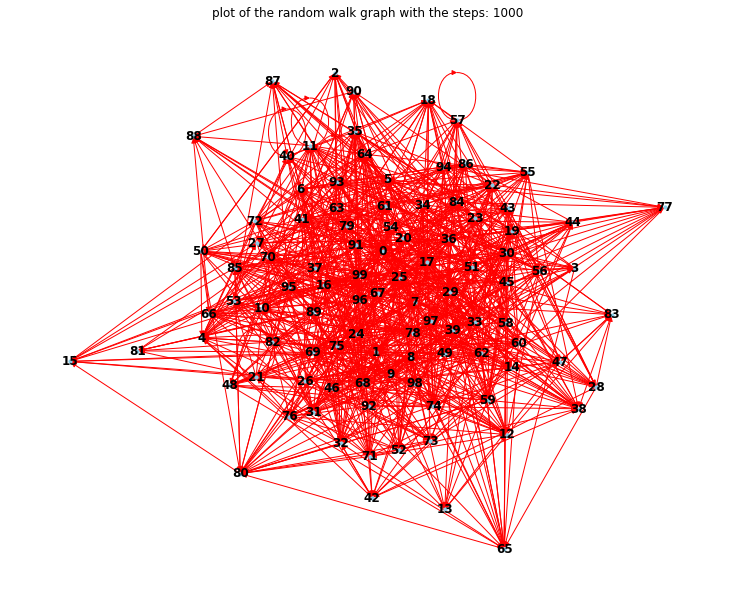

node with max in-degree: (30, 17)
node with max out-degree: (1, 17)


In [464]:
random_walk_graph2(10**3)

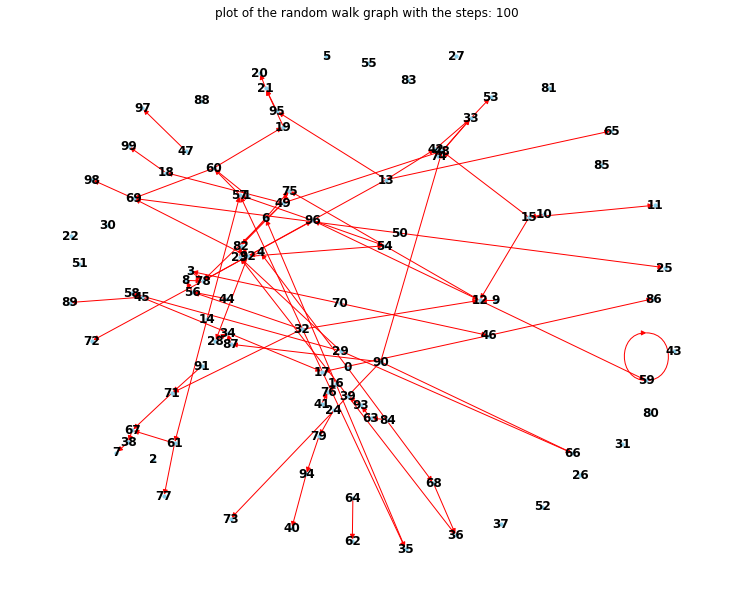

node with max in-degree: (12, 4)
node with max out-degree: (13, 4)


In [465]:
random_walk_graph2(10**2)